<center><font color="darkyellow" size="4"><b> ⚠️⚠️⚠️   &nbsp; &nbsp;! Pensez à faire une copie <u>dans votre drive</u> avant de commencer !  &nbsp; &nbsp;⚠️⚠️⚠️</b></font></center>

<center><font color="orange" size="6"><b>Les données structurées au format CSV (2ème partie)

① Fusions de tables
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;② Tris multi critères
</b></font></center>


Nous reprenons les fonctions écrites lors du précédent TP. 

téléchargez les ici :

 [⏬ libCSV.py](https://drive.google.com/file/d/15LqVEI2Xr-wHARAzmqelHRhN2j39BHZk/view?usp=sharing)  

puis importez ce fichier dans la session.

Exécutez la cellule ci-dessous pour charger ces fonctions.

In [ ]:
import csv
from libCSV import *
help(libCSV)

Help on function libCSV in module libCSV:

libCSV()
    Librairie maison pour traitement de fichiers CSV
    -------------------------------------------------
    readCSV(filename:str) -> list : lecture de fichier
    size( lstDict:list ) -> tuple : (nb_lignes,nb_colonne)
    printDictCles(dico:dict,l:int) -> None : afficher les clefs d'un dict
    printDict(dico:dict,l:int) -> None : afficher les valeurs d'un dict
    head(lstDict,n=10,l=20) -> None: afficher n enregistrement, l= largeur des colonnes
    printLstDict(lstDict:dict,l:int) -> None : afficher toute la liste de dict
    recherche(lstDict:list , cle: str , val:str ) -> list : chercher dans la liste sur une clef
    rechercheIntMoreThan( lstDict:list , cle:str , val:str ) -> list : chercher la liste ou d[clef]>val
    rechercheMoreThan( lstDict:list , cle:str , val:str ) -> list : chercher la liste ou d[clef]>val
    triLstDict(lstDict,cleTri,reverse = False) : tri selon cleTri, reverse False ou True



In [ ]:
# N'hésitez pas à abuser de help pour voir vos docstring....
help(triLstDict)

Help on function triLstDict in module libCSV:

triLstDict(lstDict, cleTri, reverse=False)
    Procédure
    Entrées : 
        lstDict : une liste de dictionnaires
        cleTri : nom d'une clef de tri (fonction)
        optionnel : reverse (True ou False)
    La liste triée selon la clef de tri (effet de bord) par défut ordre croissant, 
    décroissant sir reverse est présent et égal à False



Vous pouvez aussi double cliquer sur le fichier .py pour le lire, si besoin.

##  ⚠️ Rappel : il ne faut jamais utiliser un tableur dans ce cours


<font color="orange" size="6"><b>Première partie : Fusionner deux tables</b></font>

<font color="orange" size="5"><b>① Un exemple</b></font>



- Source : https://www.isnbreizh.fr/nsi/activity/fichierCSVPython/index.html
- Auteurs : **David Roche et Christophe Béasse.**
- Modifications : **Mireille Coilhac et Jean-Louis Thirot**



2 fichiers à télécharger puis importer dans la session :

 [⏬ personnes.csv](https://www.isnbreizh.fr/nsi/activity/fichierCSVPython/personnes.csv)  

 [⏬ transports.csv](https://www.isnbreizh.fr/nsi/activity/fichierCSVPython/transports.csv)



<font color="orange" size="4">➽ Lire les deux fichiers dans des 
listes *personnes* et *transports*</font>

In [ ]:
personnes = readCSV('personnes.csv')
transports = readCSV('transports.csv')

<font color="orange" size="4">➽ Affichez l'intégralité de la liste personnes</font>

vous pouvez utiliser les fonctions définies au début de ce notebook

In [ ]:
printLstDict(personnes,l=12)

nom         prenom      age         
------------------------------------
Durand      Jean-Pierre 32          
Dupont      Christophe  51          
Terta       Henry       37          
Kapri       Leon        45          
Lenard      Michel      17          
Lenard      Georges     15          
Herpan      stephan     22          
Mastic      Brice       61          
Pouyeau     Maxime      27          
Arox        Gilles      51          
Follin      Paul        32          



<font color="orange" size="4">➽ Affichez les informations ci-dessous : (liste transports)</font>

```
ce fichier contient  8 enregistrement
Chaque enregistrement a  8 descripteurs

age         vehicule    
------------------------
32          voiture     
51          tracteur    
37          voiture     
45          voiture     
15          trotinette 
```


In [ ]:
nli,ncol = size(transports)
print('ce fichier contient ',nli,'enregistrement')
print('Chaque enregistrement a ',nli,'descripteurs')
print()
head(transports,n=5,l=12)

ce fichier contient  8 enregistrement
Chaque enregistrement a  8 descripteurs

age         vehicule    
------------------------
32          voiture     
51          tracteur    
37          voiture     
45          voiture     
15          trotinette  


C'est assez triste non, de penser que le mode de transport est déterminé selon l'âge ? 

Mais pour aujourd'hui ce sera ainsi !

Alors du coup, comment faire afficher ceci :

```
nom                 prenom              age                 vehicule            
--------------------------------------------------------------------------------
Durand              Jean-Pierre         32                  voiture             
Dupont              Christophe          51                  tracteur            
Terta               Henry               37                  voiture             
Kapri               Leon                45                  voiture             
Lenard              Michel              17                  
Lenard              Georges             15                  trotinette          
Herpan              stephan             22                  trotinette          
Mastic              Brice               61                  tracteur            
Pouyeau             Maxime              27                  voiture             
Arox                Gilles              51                  tracteur            
Follin              Paul                32                  voiture 
```

Vous voyez qu'ici on a créé une liste avec les 3 colonnes de la liste personnes et une colonne de la liste transports. Mais ce n'est pas simplement ajouter une colonne (d'ailleurs les deux listes n'ont pas la même longueur donc ça poserait un problème).

La colonne ajoutée est déterminée selon l'âge de la personne, lue dans personnes, et le mode de transport, lu dans transports.

Il faut donc **utiliser conjointement les deux tables**.

<font color="orange" size="4">➽ Essayez !</font>
```
pour chaque individu dans  la listes personnes :
   pour chaque moyen_locomotion dans transports :
       si l'age de l'individu et l'age de moyen_locomotion son égaux :
          le vehicule de individu est le vehicule de moyen_locomotion
Affichons maintenant personnes
```

In [ ]:
for individu in personnes :
    for locomotion in transports :
        if individu['age'] == locomotion['age'] :
            individu['vehicule'] = locomotion['vehicule']
printLstDict(personnes,13)

nom          prenom       age          vehicule     
----------------------------------------------------
Durand       Jean-Pierre  32           voiture      
Dupont       Christophe   51           tracteur     
Terta        Henry        37           voiture      
Kapri        Leon         45           voiture      
Lenard       Michel       17           
Lenard       Georges      15           trotinette   
Herpan       stephan      22           trotinette   
Mastic       Brice        61           tracteur     
Pouyeau      Maxime       27           voiture      
Arox         Gilles       51           tracteur     
Follin       Paul         32           voiture      



<font color="orange" size="4">➽ Et si on créait une fonction ?</font>


In [ ]:
def mergeLstDict(lstDict1:list , lstDict2:list , condition:dict ,cle1:list , cle2:list  ) -> None :
    '''
    Entrées : 
       lstDict1 et lstDict2 deux listes de dictionnaires à fusionner
       conditions : dictionnaire de paire c1:c2 qui doivent vérifier :
            lstDict1[c1] == lstDic2[c2]
       cle1 et cle2 sont les listes des clefs qu'on veux sélectionner 
       dans les 2 lstDict
    Sortie :
        la fonction renvoie une liste de dictionnaire
    '''
    lstDict=[]
    for dict1 in lstDict1 :                        
        for dict2 in lstDict2 :                     
            ok = True
            for c1,c2 in condition.items():
                if dict1[c1] != dict2[c2] :           
                    ok = False
            if ok :
                # on va ajouter un dico dans la liste
                dict={}
                for c in cle1 :
                    dict[c] = dict1[c]
                for c in cle2 :
                    dict[c] = dict2[c]
        lstDict.append(dict)
    return lstDict

In [ ]:
personnes = readCSV('personnes.csv')
merge = mergeLstDict(personnes,transports,{'age':'age'},['nom','prenom','age'],['vehicule'])
printLstDict(merge,15)

nombre d'enregistrement lus : 10
nom            prenom         age            vehicule       
------------------------------------------------------------
Durand         Jean-Pierre    32             voiture        
Dupont         Christophe     51             tracteur       
Terta          Henry          37             voiture        
Kapri          Leon           45             voiture        
Lenard         Georges        15             trotinette     
Herpan         stephan        22             trotinette     
Mastic         Brice          61             tracteur       
Pouyeau        Maxime         27             voiture        
Arox           Gilles         51             tracteur       
Follin         Paul           32             voiture        



il faudrait penset à ajouter ce merge dans notre libCSV non ?

<font color="orange" size="5"><b>② A vous !</b></font>

Nous allons travailler avec deux tables  : `

transLine.csv` à télécharger ici:  [⏬](https://drive.google.com/file/d/10ssjxAlOL48wsUAAYltanHoPpw7YO9gw/view?usp=sharing)

ville_100k.csv à télécharger ici: [⏬](https://drive.google.com/file/d/1qTm8x3KpLUJaPdn7wQ1iQm85afKx_Rrv/view?usp=sharing)

Sauvegardez sur un disque puis importez dans le notebook.

<font color="orange" size="4">➽ Lire les deux fichiers -> villes et lignes</font>


In [ ]:
villes = readCSV('villes_100k.csv')
lignes = readCSV('transLine.csv')

Examinez le contenu du fichier des villes. Il contient la liste de villes Française (métropole uniquement) de plus de 100000 habitants.

Chaque ville est identifiée par un n° (colonne **id**).


In [ ]:
head(villes)

id                  dep                 nom                 ha                  dens                surf                long                lat                 
----------------------------------------------------------------------------------------------------------------------------------------------------------------
1                   75                  Paris               2211000             21288               105.4               2.34445             48.86               
2                   13                  Marseille           851400              3535                240.62              5.37639             43.2967             
3                   69                  Lyon                474900              10117               47.87               4.84139             45.7589             
4                   31                  Toulouse            439600              3734                118.3               1.43333             43.6                
5                   6             


<font color="orange" size="4">➽ Visualisez le contenu avec head() ?</font>



In [ ]:
head(lignes)

orig                dest                dist                
------------------------------------------------------------
6                   12                  207                 
6                   33                  12                  
6                   33                  12                  
6                   29                  409                 
6                   13                  285                 
13                  32                  809                 
13                  27                  877                 
13                  15                  73                  
13                  22                  1496                
13                  33                  866                 


Dans ce fichier on trouve les liaisons routières (en bus) de la compagnie (fictive) TransLine.

Chaque ligne ne comporte que 3 descripteurs : 

- id de la ville de départ **orig**
- id de la ville destination **dest**
- distance **dist**

un couple origine-destination peut figurer 2 fois dans le fichier si la ligne est desservie 2 fois par jour. Les lignes sont en aller simple (la stratégie de cette compagnie est un peu étrange).

Référencer les villes par leur id permet d'avoir un fichier très léger, réduisant l'espace de stockage. Mais du coup, comment retrouver, pour chaque ligne, la ville de départ et la ville de destination ???

Il va falloir utiliser, **conjointement**, les deux fichiers, celui des villes et celui des lignes.


<font color="orange" size="4">➽ Utilisez **conjointement** ces deux fichiers ?</font>

Vous devez créer une listes de dictionnaire, qui sera nommée **dessertes**, dans laquelle chaque élément est un dictionnaire contenant 3 clefs :
- orig : le nom de la ville (et pas son id)
- dest : idem
- dist : la distance entre les 2 villes

vous ne pouvez pas utiliser notre fonction merge, il va falloir l'adapter

In [ ]:
dessertes = []
for line in lignes:
    d = line['dist']
    for v in villes:
         if v['id']==line['orig']:
            orig = v['nom']
         if v['id']==line['dest']:
            dest = v['nom']
    dessertes.append( {'orig':orig,'dest':dest,'dist':d} )

✅ vérification

In [ ]:
assert dessertes == [{'orig': 'Nantes', 'dest': 'Reims', 'dist': '207'}, {'orig': 'Nantes', 'dest': 'Boulogne-Billancourt', 'dist': '12'}, {'orig': 'Nantes', 'dest': 'Boulogne-Billancourt', 'dist': '12'}, {'orig': 'Nantes', 'dest': 'Metz', 'dist': '409'}, {'orig': 'Nantes', 'dest': 'Le Havre', 'dist': '285'}, {'orig': 'Le Havre', 'dest': 'Orléans', 'dist': '809'}, {'orig': 'Le Havre', 'dest': 'Tours', 'dist': '877'}, {'orig': 'Le Havre', 'dest': 'Toulon', 'dist': '73'}, {'orig': 'Le Havre', 'dest': 'Brest', 'dist': '1496'}, {'orig': 'Le Havre', 'dest': 'Boulogne-Billancourt', 'dist': '866'}, {'orig': 'Boulogne-Billancourt', 'dest': 'Toulouse', 'dist': '556'}, {'orig': 'Boulogne-Billancourt', 'dest': 'Montpellier', 'dist': '311'}, {'orig': 'Boulogne-Billancourt', 'dest': 'Mulhouse', 'dist': '448'}, {'orig': 'Boulogne-Billancourt', 'dest': 'Marseille', 'dist': '299'}, {'orig': 'Boulogne-Billancourt', 'dest': 'Paris', 'dist': '559'}, {'orig': 'Paris', 'dest': 'Le Mans', 'dist': '563'}, {'orig': 'Paris', 'dest': 'Marseille', 'dist': '424'}, {'orig': 'Paris', 'dest': 'Mulhouse', 'dist': '1004'}, {'orig': 'Paris', 'dest': 'Besançon', 'dist': '825'}, {'orig': 'Paris', 'dest': 'Lyon', 'dist': '556'}, {'orig': 'Lyon', 'dest': 'Brest', 'dist': '1643'}, {'orig': 'Lyon', 'dest': 'Reims', 'dist': '876'}, {'orig': 'Lyon', 'dest': 'Boulogne-Billancourt', 'dist': '1013'}, {'orig': 'Lyon', 'dest': 'Mulhouse', 'dist': '413'}, {'orig': 'Lyon', 'dest': 'Dijon', 'dist': '585'}, {'orig': 'Dijon', 'dest': 'Montpellier', 'dist': '905'}, {'orig': 'Dijon', 'dest': 'Dijon', 'dist': '666'}, {'orig': 'Dijon', 'dest': 'Clermont-Ferrand', 'dist': '606'}, {'orig': 'Dijon', 'dest': 'Lyon', 'dist': '784'}, {'orig': 'Lyon', 'dest': 'Tours', 'dist': '826'}, {'orig': 'Lyon', 'dest': 'Amiens', 'dist': '676'}, {'orig': 'Lyon', 'dest': 'Saint-Étienne', 'dist': '649'}, {'orig': 'Lyon', 'dest': 'Nîmes', 'dist': '815'}, {'orig': 'Lyon', 'dest': 'Saint-Étienne', 'dist': '649'}, {'orig': 'Saint-Étienne', 'dest': 'Perpignan', 'dist': '191'}, {'orig': 'Saint-Étienne', 'dest': 'Lyon', 'dist': '311'}, {'orig': 'Saint-Étienne', 'dest': 'Perpignan', 'dist': '191'}, {'orig': 'Saint-Étienne', 'dest': 'Rennes', 'dist': '1004'}, {'orig': 'Saint-Étienne', 'dest': 'Orléans', 'dist': '630'}, {'orig': 'Orléans', 'dest': 'Boulogne-Billancourt', 'dist': '681'}, {'orig': 'Orléans', 'dest': 'Villeurbanne', 'dist': '638'}, {'orig': 'Orléans', 'dest': 'Perpignan', 'dist': '559'}, {'orig': 'Orléans', 'dest': 'Nice', 'dist': '894'}, {'orig': 'Orléans', 'dest': 'Dijon', 'dist': '806'}, {'orig': 'Dijon', 'dest': 'Nîmes', 'dist': '808'}, {'orig': 'Dijon', 'dest': 'Toulon', 'dist': '1038'}, {'orig': 'Dijon', 'dest': 'Bordeaux', 'dist': '943'}, {'orig': 'Dijon', 'dest': 'Perpignan', 'dist': '813'}, {'orig': 'Dijon', 'dest': 'Brest', 'dist': '978'}, {'orig': 'Brest', 'dest': 'Lyon', 'dist': '884'}, {'orig': 'Brest', 'dest': 'Tours', 'dist': '306'}, {'orig': 'Brest', 'dest': 'Bordeaux', 'dist': '436'}, {'orig': 'Brest', 'dest': 'Angers', 'dist': '174'}, {'orig': 'Brest', 'dest': 'Besançon', 'dist': '854'}, {'orig': 'Besançon', 'dest': 'Dijon', 'dist': '291'}, {'orig': 'Besançon', 'dest': 'Angers', 'dist': '636'}, {'orig': 'Besançon', 'dest': 'Toulouse', 'dist': '825'}, {'orig': 'Besançon', 'dest': 'Bordeaux', 'dist': '901'}, {'orig': 'Besançon', 'dest': 'Nice', 'dist': '876'}, {'orig': 'Nice', 'dest': 'Orléans', 'dist': '334'}, {'orig': 'Nice', 'dest': 'Nancy', 'dist': '688'}, {'orig': 'Nice', 'dest': 'Nîmes', 'dist': '988'}, {'orig': 'Nice', 'dest': 'Nantes', 'dist': '396'}, {'orig': 'Nice', 'dest': 'Strasbourg', 'dist': '853'}, {'orig': 'Strasbourg', 'dest': 'Nice', 'dist': '458'}, {'orig': 'Strasbourg', 'dest': 'Brest', 'dist': '1185'}, {'orig': 'Strasbourg', 'dest': 'Nancy', 'dist': '505'}, {'orig': 'Strasbourg', 'dest': 'Nîmes', 'dist': '165'}, {'orig': 'Strasbourg', 'dest': 'Le Mans', 'dist': '676'}, {'orig': 'Le Mans', 'dest': 'Reims', 'dist': '803'}, {'orig': 'Le Mans', 'dest': 'Metz', 'dist': '624'}, {'orig': 'Le Mans', 'dest': 'Strasbourg', 'dist': '728'}, {'orig': 'Le Mans', 'dest': 'Metz', 'dist': '624'}, {'orig': 'Le Mans', 'dest': 'Mulhouse', 'dist': '603'}, {'orig': 'Mulhouse', 'dest': 'Dijon', 'dist': '284'}, {'orig': 'Mulhouse', 'dest': 'Bordeaux', 'dist': '661'}, {'orig': 'Mulhouse', 'dest': 'Amiens', 'dist': '814'}, {'orig': 'Mulhouse', 'dest': 'Angers', 'dist': '856'}, {'orig': 'Mulhouse', 'dest': 'Nancy', 'dist': '399'}, {'orig': 'Nancy', 'dest': 'Rennes', 'dist': '746'}, {'orig': 'Nancy', 'dest': 'Nancy', 'dist': '254'}, {'orig': 'Nancy', 'dest': 'Besançon', 'dist': '108'}, {'orig': 'Nancy', 'dest': 'Strasbourg', 'dist': '399'}, {'orig': 'Nancy', 'dest': 'Boulogne-Billancourt', 'dist': '428'}, {'orig': 'Boulogne-Billancourt', 'dest': 'Nantes', 'dist': '125'}, {'orig': 'Boulogne-Billancourt', 'dest': 'Nancy', 'dist': '796'}, {'orig': 'Boulogne-Billancourt', 'dest': 'Metz', 'dist': '838'}, {'orig': 'Boulogne-Billancourt', 'dest': 'Nîmes', 'dist': '853'}, {'orig': 'Boulogne-Billancourt', 'dest': 'Rennes', 'dist': '174'}, {'orig': 'Rennes', 'dest': 'Reims', 'dist': '508'}, {'orig': 'Rennes', 'dest': 'Strasbourg', 'dist': '813'}, {'orig': 'Rennes', 'dest': 'Amiens', 'dist': '399'}, {'orig': 'Rennes', 'dest': 'Le Havre', 'dist': '156'}, {'orig': 'Rennes', 'dest': 'Rennes', 'dist': '196'}, {'orig': 'Rennes', 'dest': 'Nancy', 'dist': '591'}, {'orig': 'Rennes', 'dest': 'Toulon', 'dist': '91'}, {'orig': 'Rennes', 'dest': 'Le Mans', 'dist': '970'}, {'orig': 'Rennes', 'dest': 'Brest', 'dist': '1478'}, {'orig': 'Rennes', 'dest': 'Nancy', 'dist': '591'}, {'orig': 'Nancy', 'dest': 'Lyon', 'dist': '1196'}, {'orig': 'Nancy', 'dest': 'Angers', 'dist': '486'}, {'orig': 'Nancy', 'dest': 'Nantes', 'dist': '411'}, {'orig': 'Nancy', 'dest': 'Saint-Étienne', 'dist': '1185'}, {'orig': 'Nancy', 'dest': 'Orléans', 'dist': '686'}, {'orig': 'Orléans', 'dest': 'Brest', 'dist': '1199'}, {'orig': 'Orléans', 'dest': 'Rennes', 'dist': '888'}, {'orig': 'Orléans', 'dest': 'Strasbourg', 'dist': '568'}, {'orig': 'Orléans', 'dest': 'Toulon', 'dist': '369'}, {'orig': 'Orléans', 'dest': 'Clermont-Ferrand', 'dist': '181'}, {'orig': 'Clermont-Ferrand', 'dest': 'Dijon', 'dist': '415'}, {'orig': 'Clermont-Ferrand', 'dest': 'Tours', 'dist': '721'}, {'orig': 'Clermont-Ferrand', 'dest': 'Boulogne-Billancourt', 'dist': '710'}, {'orig': 'Clermont-Ferrand', 'dest': 'Mulhouse', 'dist': '690'}, {'orig': 'Clermont-Ferrand', 'dest': 'Rouen', 'dist': '886'}, {'orig': 'Rouen', 'dest': 'Mulhouse', 'dist': '798'}, {'orig': 'Rouen', 'dest': 'Metz', 'dist': '819'}, {'orig': 'Rouen', 'dest': 'Angers', 'dist': '341'}, {'orig': 'Rouen', 'dest': 'Reims', 'dist': '618'}, {'orig': 'Rouen', 'dest': 'Boulogne-Billancourt', 'dist': '398'}, {'orig': 'Boulogne-Billancourt', 'dest': 'Amiens', 'dist': '490'}, {'orig': 'Boulogne-Billancourt', 'dest': 'Amiens', 'dist': '490'}, {'orig': 'Boulogne-Billancourt', 'dest': 'Bordeaux', 'dist': '459'}, {'orig': 'Boulogne-Billancourt', 'dest': 'Marseille', 'dist': '477'}, {'orig': 'Marseille', 'dest': 'Toulon', 'dist': '951'}, {'orig': 'Marseille', 'dest': 'Nîmes', 'dist': '721'}, {'orig': 'Marseille', 'dest': 'Toulon', 'dist': '951'}, {'orig': 'Marseille', 'dest': 'Clermont-Ferrand', 'dist': '399'}, {'orig': 'Marseille', 'dest': 'Rennes', 'dist': '306'}, {'orig': 'Rennes', 'dest': 'Besançon', 'dist': '638'}, {'orig': 'Rennes', 'dest': 'Clermont-Ferrand', 'dist': '490'}, {'orig': 'Rennes', 'dest': 'Nantes', 'dist': '653'}, {'orig': 'Rennes', 'dest': 'Besançon', 'dist': '638'}, {'orig': 'Besançon', 'dest': 'Reims', 'dist': '225'}, {'orig': 'Besançon', 'dest': 'Clermont-Ferrand', 'dist': '643'}, {'orig': 'Besançon', 'dest': 'Tours', 'dist': '723'}, {'orig': 'Besançon', 'dest': 'Perpignan', 'dist': '973'}, {'orig': 'Besançon', 'dest': 'Mulhouse', 'dist': '254'}, {'orig': 'Mulhouse', 'dest': 'Marseille', 'dist': '461'}, {'orig': 'Mulhouse', 'dest': 'Marseille', 'dist': '461'}, {'orig': 'Mulhouse', 'dest': 'Aix-en-Provence', 'dist': '431'}, {'orig': 'Mulhouse', 'dest': 'Clermont-Ferrand', 'dist': '441'}, {'orig': 'Mulhouse', 'dest': 'Grenoble', 'dist': '239'}, {'orig': 'Grenoble', 'dest': 'Saint-Étienne', 'dist': '426'}, {'orig': 'Grenoble', 'dest': 'Besançon', 'dist': '771'}, {'orig': 'Grenoble', 'dest': 'Lyon', 'dist': '503'}, {'orig': 'Grenoble', 'dest': 'Le Mans', 'dist': '800'}, {'orig': 'Grenoble', 'dest': 'Dijon', 'dist': '676'}, {'orig': 'Dijon', 'dest': 'Mulhouse', 'dist': '560'}, {'orig': 'Dijon', 'dest': 'Le Havre', 'dist': '334'}, {'orig': 'Dijon', 'dest': 'Lille', 'dist': '388'}, {'orig': 'Dijon', 'dest': 'Besançon', 'dist': '480'}, {'orig': 'Dijon', 'dest': 'Mulhouse', 'dist': '560'}, {'orig': 'Mulhouse', 'dest': 'Nantes', 'dist': '541'}, {'orig': 'Mulhouse', 'dest': 'Bordeaux', 'dist': '681'}, {'orig': 'Mulhouse', 'dest': 'Nice', 'dist': '1013'}, {'orig': 'Mulhouse', 'dest': 'Clermont-Ferrand', 'dist': '388'}, {'orig': 'Mulhouse', 'dest': 'Aix-en-Provence', 'dist': '848'}, {'orig': 'Aix-en-Provence', 'dest': 'Lyon', 'dist': '448'}, {'orig': 'Aix-en-Provence', 'dest': 'Brest', 'dist': '1246'}, {'orig': 'Aix-en-Provence', 'dest': 'Nantes', 'dist': '941'}, {'orig': 'Aix-en-Provence', 'dest': 'Aix-en-Provence', 'dist': '611'}, {'orig': 'Aix-en-Provence', 'dest': 'Limoges', 'dist': '798'}, {'orig': 'Limoges', 'dest': 'Villeurbanne', 'dist': '864'}, {'orig': 'Limoges', 'dest': 'Reims', 'dist': '445'}, {'orig': 'Limoges', 'dest': 'Orléans', 'dist': '351'}, {'orig': 'Limoges', 'dest': 'Mulhouse', 'dist': '911'}, {'orig': 'Mulhouse', 'dest': 'Reims', 'dist': '313'}, {'orig': 'Mulhouse', 'dest': 'Caen', 'dist': '168'}, {'orig': 'Mulhouse', 'dest': 'Lyon', 'dist': '743'}, {'orig': 'Mulhouse', 'dest': 'Lille', 'dist': '318'}, {'orig': 'Mulhouse', 'dest': 'Lille', 'dist': '318'}, {'orig': 'Lille', 'dest': 'Montpellier', 'dist': '739'}, {'orig': 'Lille', 'dest': 'Villeurbanne', 'dist': '423'}, {'orig': 'Lille', 'dest': 'Limoges', 'dist': '778'}, {'orig': 'Lille', 'dest': 'Nîmes', 'dist': '670'}, {'orig': 'Lille', 'dest': 'Boulogne-Billancourt', 'dist': '409'}]

<font color="orange" size="4">➽ Affichez le head de dessertes (ajustez la largeur des colonnes...)</font>

In [ ]:
head(dessertes,l=40)

orig                                    dest                                    dist                                    
------------------------------------------------------------------------------------------------------------------------
Nantes                                  Reims                                   207                                     
Nantes                                  Boulogne-Billancourt                    12                                      
Nantes                                  Boulogne-Billancourt                    12                                      
Nantes                                  Metz                                    409                                     
Nantes                                  Le Havre                                285                                     
Le Havre                                Orléans                                 809                                     
Le Havre                        

<font color="orange" size="4">➽ Affichez le nombre de lignes et la distance moyenne</font>

 ```
nombre de lignes : 176
distance moyenne : 614.0056818181819
```

In [ ]:
nb_lignes = len(dessertes)
print("nombre de lignes :",nb_lignes)
dist_totale = 0
for ligne in dessertes :
    dist_totale += int(ligne['dist'])
print('distance moyenne :',dist_totale/nb_lignes)

nombre de lignes : 176
distance moyenne : 614.0056818181819


Vous avez remarqué que nous avons été obligé de convertir dist en integer. Dans le fichier, dist est une chaîne de caractère, nous préfèrerions que ce soit des entiers....

<font color="orange" size="4">➽ Modifiez la liste dessertes, pour que les valeurs de clefs 'dist' soient des entiers</font>

In [ ]:
for ligne in dessertes :
    ligne['dist'] = int(ligne['dist'])
head(dessertes)

orig                dest                dist                
------------------------------------------------------------
Nantes              Reims               207                 
Nantes              Boulogne-Billancour 12                  
Nantes              Boulogne-Billancour 12                  
Nantes              Metz                409                 
Nantes              Le Havre            285                 
Le Havre            Orléans             809                 
Le Havre            Tours               877                 
Le Havre            Toulon              73                  
Le Havre            Brest               1496                
Le Havre            Boulogne-Billancour 866                 


<font color="orange" size="4">➽ Affichez les dessertes au départ de Paris</font>

In [ ]:
desserteParis = recherche(dessertes,'orig','Paris')
head(desserteParis)

orig                dest                dist                
------------------------------------------------------------
Paris               Le Mans             563                 
Paris               Marseille           424                 
Paris               Mulhouse            1004                
Paris               Besançon            825                 
Paris               Lyon                556                 


<font color="orange" size="4">➽ Affichez les dessertes au départ de Paris par distance croissantes
</font>

In [ ]:
def cleDist(dic) :
    return dic['dist']

desserteParis = recherche(dessertes,'orig','Paris')
triLstDict(desserteParis,cleDist,reverse=True)
head(desserteParis)

orig                dest                dist                
------------------------------------------------------------
Paris               Besançon            825                 
Paris               Le Mans             563                 
Paris               Lyon                556                 
Paris               Marseille           424                 
Paris               Mulhouse            1004                


<font color="orange" size="4">➽ Affichez les TRAJETS au départ de Paris à destination de Nantes avec une escale

---


</font>

In [ ]:
desserteParis = recherche(dessertes,'orig','Paris')
triLstDict(desserteParis,cleDist,reverse=True)

destFinale = 'Nantes'

trajet = []
for line in desserteParis :
    dest = line['dest']
    desserte2 = recherche(dessertes,'orig', dest) # liste des desserte depuis dest
    for dest2 in desserte2 :
        if dest2['dest']==destFinale: trajet.append('Paris - '+dest+' - '+destFinale)
print(trajet)


['Paris - Mulhouse - Nantes']


<font color="orange" size="4">➽ Affichez la même information mais pour Paris-Dijon et avec la distance totale

Vous devriez trouver :
```
Paris - Besançon - Dijon (1116)
Paris - Lyon - Dijon (1141)
Paris - Mulhouse - Dijon (1288)
```


In [ ]:
desserteParis = recherche(dessertes,'orig','Paris')
triLstDict(desserteParis,cleDist,reverse=True)

destFinale = 'Dijon'

trajet = []
for line in desserteParis :
    dest = line['dest']
    distanceTotal = int(line['dist'])
    desserte2 = recherche(dessertes,'orig', dest) # liste des desserte depuis dest
    for dest2 in desserte2 :
        if dest2['dest']==destFinale: 
            distanceTotal += int(dest2['dist'])
            trajet.append('Paris - '+dest+' - '+destFinale+' ('+str(distanceTotal)+')')
for t in trajet :
    print(t)


Paris - Besançon - Dijon (1116)
Paris - Lyon - Dijon (1141)
Paris - Mulhouse - Dijon (1288)


<font color="orange" size="6"><b>Deuxième partie : Tri sur deux critères</b></font>

Il arrive parfois qu'on veuille trier sur 2 ou même plus de critères. Voyons un exemple dans un ca simple :

In [ ]:
personnes = readCSV('personnes.csv')

def cle_tri_nom(dic) :
    return dic['nom']

def cle_tri_age(dic) :
    return dic['age']

print('le fichier lu non trié :')
printLstDict(personnes,14)

triLstDict(personnes,cle_tri_nom)
print('le fichier trié par noms :')
printLstDict(personnes,14)

triLstDict(personnes,cle_tri_age)
print('le fichier trié par age :')
printLstDict(personnes,14)

le fichier lu non trié :
nom           prenom        age           
------------------------------------------
Durand        Jean-Pierre   32            
Dupont        Christophe    51            
Terta         Henry         37            
Kapri         Leon          45            
Lenard        Michel        17            
Lenard        Georges       15            
Herpan        stephan       22            
Mastic        Brice         61            
Pouyeau       Maxime        27            
Arox          Gilles        51            
Follin        Paul          32            

le fichier trié par noms :
nom           prenom        age           
------------------------------------------
Arox          Gilles        51            
Dupont        Christophe    51            
Durand        Jean-Pierre   32            
Follin        Paul          32            
Herpan        stephan       22            
Kapri         Leon          45            
Lenard        Michel        17            
L

Nous allons refaire maintenant le tri par nom :



In [ ]:
triLstDict(personnes,cle_tri_nom)
print('le fichier trié par noms :')
printLstDict(personnes,14)

le fichier trié par noms :
nom           prenom        age           
------------------------------------------
Arox          Gilles        51            
Dupont        Christophe    51            
Durand        Jean-Pierre   32            
Follin        Paul          32            
Herpan        stephan       22            
Kapri         Leon          45            
Lenard        Georges       15            
Lenard        Michel        17            
Mastic        Brice         61            
Pouyeau       Maxime        27            
Terta         Henry         37            



Vous pensez certainement que le tri par nom donne le même résultat la seconde fois que la première ?

Si c'est le cas... regardez bien :<center>

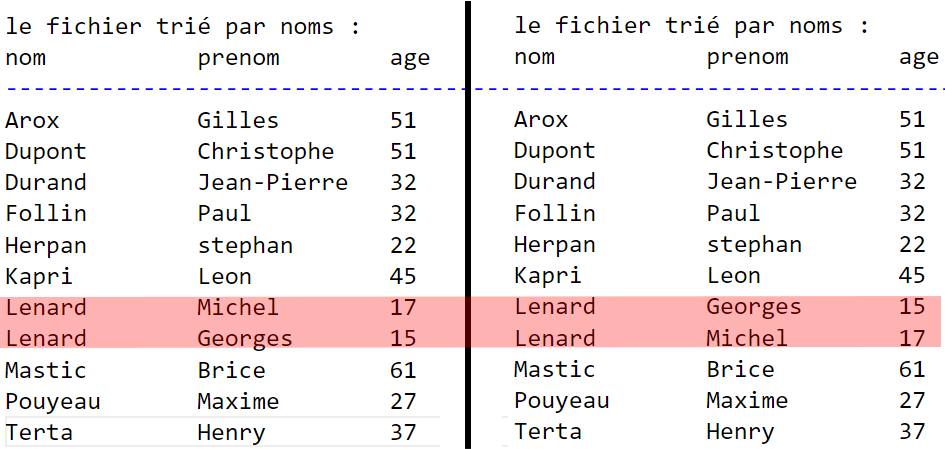

</center>


Bizzare non ? La première fois qu'on a trié par nom, Michel était avant Georges, et la seconde fois, avec la même clef de tri, Georges est avant Michel.

En réalité, lors du tri par noms, il n'y a aucune raison de mettre l'un avant ou après l'autre. Alors le tri les laisse dans le même ordre que avant le tri.

**Dans le 1er cas** avant le tri, on avait seulement lu le fichier, et Michel était avant Georges.

**Dans le 2d cas** avant le tri, on avait trié par age, et Michel était passé après Georges.

Dans les deux cas, l'ordre des enregistrements dont la clef de tri est identique sera préservé.

>  <font color="darkyellow"><b>la fonction de tri de Python vérifie une propriété très
importante : **la stabilité**. <br>
> Cela signifie que lors d’un tri, si plusieurs enregistrement ont la
même clé, l’ordre initial des enregistrements est conservé</b></font> 




Ainsi, le tri par nom, et secondairement, en cas d'homonyme, sur l'âge, est rendu possible en triant une première fois sur l'âge (critère secondaire) puis sur le nom (critère principal).

Si on avait 3 critères, par exemple, Nom, en cas d'homonymie, classe sur le prénom, et en cas de même nom+prénom, l'âge, on procèderait de même :

> 1) tri sur l'age en 1er<br>
> 2) tri sur le prénom<br>
> 3) tri sur le nom en dernier (critère principal)

Le sens croissant décroissant peut être différent lors de chaque tri, mais toujours, le tri suivant conservera l'ordre du précédent pour les enregistrement ayant même clef.


<center>

---

**Auteur** Jean-Louis Thirot - Lycée Bertrand d'Argentré - Vitré (35)

Publié sous licence CC BY-NC-SA


---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" width="200" src="https://s2.qwant.com/thumbr/700x0/f/9/436dcce5e02185c0b2e1b0e7a969aa81d7b0438d0a7f2eaee89abb9661b70b/cc-by-nc-sa.svg_.png?u=http%3A%2F%2Fopensiddur.org%2Fwp-content%2Fuploads%2F2011%2F03%2Fcc-by-nc-sa.svg_.png&q=0&b=1&p=0&a=1" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>. 